# Ford GoBike System Data
# (January 2019 - December 2019)

## by Nancy Harrington 

## Preliminary Wrangling

> The data set used for analysis is taken from the Ford GoBike data for the year 2019.  The data detailed bike trips taken by riders and the characteristics that were associated with every trip.  Those characteristics included the duration of the trip, start & end times, start & end stations, user type, start station latitude & longitude, end station latitude & longitude, bike id, and  bike share for all trip.

In [72]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import datetime


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [7]:
# load dataset
path = r'C:\Users\nharr\Documents\Udacity\Visual_project\FordGoBikeData'

all_files=glob.glob(os.path.join(path, "*.csv"))

all_files

list_csv=[]

for file in all_files:

    list_csv.append(pd.read_csv(file,sep=','))

df_master=pd.concat(list_csv)

df_master.to_csv('ford_master.csv',index=False)

C:\Users\nharr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\nharr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\nharr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Assessing Data

In [8]:
# read the data 
df= pd.read_csv('ford_master.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [10]:
# look at how many rows and columns 
df.shape

(2506983, 15)

In [11]:
# sample the data to see what needs to be cleaned 
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
820810,219,2019-04-06 02:08:33.1230,2019-04-06 02:12:12.9270,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4502,Subscriber,Yes,NaN
2181988,605,2019-11-26 08:16:55.0670,2019-11-26 08:27:00.2930,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,350.0,8th St at Brannan St,37.771431,-122.405787,11612,Subscriber,No,NaN
15185,556,2019-01-30 10:55:21.1740,2019-01-30 11:04:38.1430,373.0,Potrero del Sol Park (25th St at Utah St),37.751792,-122.405216,355.0,23rd St at Tennessee St,37.755367,-122.388795,322,Subscriber,No,NaN
200901,619,2019-02-28 08:00:53.1570,2019-02-28 08:11:12.2770,370.0,Jones St at Post St,37.787327,-122.413278,58.0,Market St at 10th St,37.776619,-122.417385,5023,Subscriber,No,NaN
1450379,645,2019-07-22 18:38:06,2019-07-22 18:48:52,NaN,NaN,37.775079,-122.444954,96.0,Dolores St at 15th St,37.766210,-122.426614,181696,Subscriber,NaN,app
1865605,1795,2019-09-10 19:10:27.2710,2019-09-10 19:40:22.3110,163.0,Lake Merritt BART Station,37.797320,-122.265320,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,1497,Subscriber,No,NaN
2030502,997,2019-10-18 17:47:19.1240,2019-10-18 18:03:56.7640,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,384.0,Jackson St at Polk St,37.794160,-122.421568,1827,Subscriber,No,NaN
1598230,978,2019-08-18 14:34:55.5960,2019-08-18 14:51:14.2420,75.0,Market St at Franklin St,37.773793,-122.421239,109.0,17th St at Valencia St,37.763316,-122.421904,3391,Customer,No,NaN
2128857,1630,2019-10-06 13:12:58.5430,2019-10-06 13:40:09.0960,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,75.0,Market St at Franklin St,37.773793,-122.421239,10538,Customer,No,NaN
944410,111,2019-05-19 20:03:08.8390,2019-05-19 20:05:00.5160,327.0,5th St at San Salvador St,37.332039,-121.881766,317.0,San Salvador St at 9th St,37.333955,-121.877349,2362,Subscriber,No,NaN


In [13]:
# look at the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [16]:
# look at the statistics 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [17]:
# look for duplicates 
df.duplicated().sum()

0

In [18]:
# look for NaN values 
df.isna().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

### Quality 


- Start time and end time are not in timestamp format. 
- Missing values for: start_station_id, start_station_name, end_station_id, end_station_name, bike_share_for_all_trip, and rental_access_method.
- Add descriptive columns for the months/weekdays/hours for better analysis. 
- duration is in seconds.
 

# Cleaning

In [35]:
# make a copy of the dataframe
df_clean = df.copy()

In [36]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


##### Define
- Change the start time and end time into datetime format. 

##### Code 

In [37]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

##### Test

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(5)
memory usage: 286.9+ MB


##### Define
- Add the month name column
- Add the month number column
- Add the weekday column
- Add start and end time hour column
- Add the month date column

##### Code

In [39]:
# Start time month (January - December)
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')


In [40]:
# Start time month (1-12)
df_clean['start_time_month_num'] = df_clean['start_time'].dt.month.astype(int)


In [41]:
# Start time weekday
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%a')


In [42]:
# Start and end time hour
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour

In [43]:
# Start time date of the month
df_clean['start_time_date']= df_clean['start_time'].dt.day

##### Test

In [44]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,start_time_date
316868,518,2019-02-11 08:15:10.415,2019-02-11 08:23:49.152,120.0,Mission Dolores Park,37.761420,-122.426435,58.0,Market St at 10th St,37.776619,...,4644,Subscriber,No,NaN,February,2,Mon,8,8,11
1652588,734,2019-08-10 10:04:31.287,2019-08-10 10:16:46.187,171.0,Rockridge BART Station,37.844279,-122.251900,267.0,Derby St at College Ave,37.861804,...,3191,Subscriber,No,NaN,August,8,Sat,10,10,10
1384581,504,2019-07-07 07:29:59.574,2019-07-07 07:38:24.550,75.0,Market St at Franklin St,37.773793,-122.421239,95.0,Sanchez St at 15th St,37.766219,...,353,Subscriber,No,NaN,July,7,Sun,7,7,7
1520128,512,2019-08-29 08:54:17.531,2019-08-29 09:02:49.578,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,...,10220,Subscriber,No,NaN,August,8,Thu,8,9,29
1397899,615,2019-07-03 14:47:42.364,2019-07-03 14:57:57.494,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,86.0,Market St at Dolores St,37.769305,...,283,Subscriber,No,NaN,July,7,Wed,14,14,3


##### Define
- Change the duration column from seconds into minutes. 

##### Code

In [46]:
# Duration in seconds to duration in minutes
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)


##### Test

In [48]:
df_clean.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,start_time_date,duration_min
2115052,1063,2019-10-08 08:32:56.953,2019-10-08 08:50:40.136,54.0,Alamo Square (Steiner St at Fulton St),37.777547,-122.433274,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,Subscriber,No,NaN,October,10,Tue,8,8,8,17


**Save cleaned dataframe to a new dataframe**

In [49]:
df_clean.to_csv('ford_master_clean.csv', index = False)

### What is the structure of your dataset?

> For 2019 there was 2,506,983 rides taken in the Bay area with 15 different column characteristics(duration_sec, start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,  end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, bike_share_for_all_trip, rental_access_method) The data was then cleaned and columns were added to help with visualiation and understanding of data trends (start_time_month, start_time_month_num, start_time_weekday,start_time_hour, end_time_hour, start_time_date, duration_min) 

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest for the dataset are most popular months and days of usage. Also I would like to see the average duration of the ride and most popular start and end stations. And the user type if they are a member or a casual rider.  The bike share for all is for Bay Area residents who qualify for CalFresh, SFMTA Lifeline Pass, or PG&E CARE utility discount are eligible to join our Bike Share for all program and I would like to see how beneficial that program is. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features of the dataset that will help support my investigation will be the months and weekdays and duration columns as well as the user type and bike share for all columns and the stations columns. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

**1.) What is the most popular rental day of the week?**

In [50]:
# remove standard color palette to a plain one
base_color = sb.color_palette()[0]

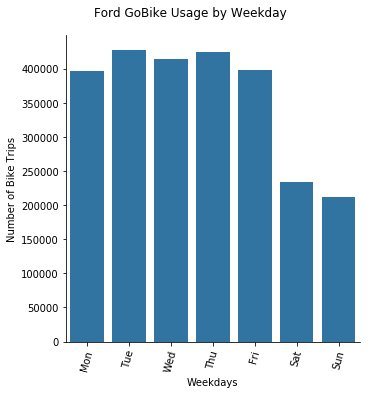

In [51]:
# weekday usage of the bike share 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df = sb.catplot(data=df_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday)

df.set_axis_labels('Weekdays', 'Number of Bike Trips')

df.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05);

df.set_xticklabels(rotation=75);

**1a.) During the week is substansually more popular for bike share riders with Tuesday being the most popular.**

**2.) What is the most popular rental month?**

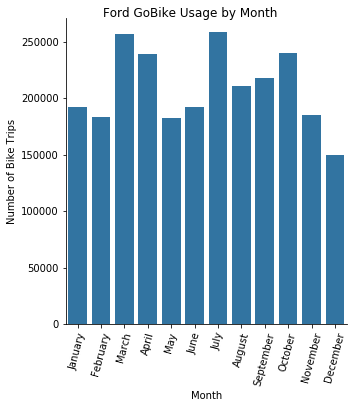

In [52]:
# monthly usage of bike share
df = sb.catplot(data = df_clean, x = 'start_time_month', kind = 'count', color = base_color);

df.set_axis_labels('Month', 'Number of Bike Trips'),

df.fig.suptitle('Ford GoBike Usage by Month', y = 1.0);

df.set_xticklabels(rotation=75);

**2a.) March, April and July are the most popular months. Im guessing the spring months with the good weather and I would be curious to see if July was due to tourism.** 

**3.) What is the most popular rental hour?**

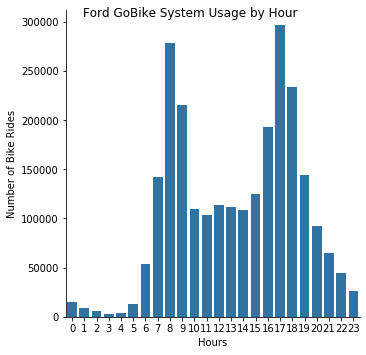

In [74]:
# most popular time of day for bike share
df = sb.catplot(data = df_clean, x='start_time_hour', kind='count', color = base_color)

df.set_axis_labels('Hours', 'Number of Bike Rides')

df.fig.suptitle('Ford GoBike System Usage by Hour');

**3a.) The most popular times of day are at 8-9 in the morning and at 5-6 in the evening which leads me to believe that they are being used to comute to work.**

**4.) What are the most popular start stations?**

In [81]:
top_start_stations_df = df_clean.start_station_name.value_counts()[:10].index

In [82]:
top_start_stations_df = df_clean[df_clean.start_station_name.isin(top_start_stations)].copy()

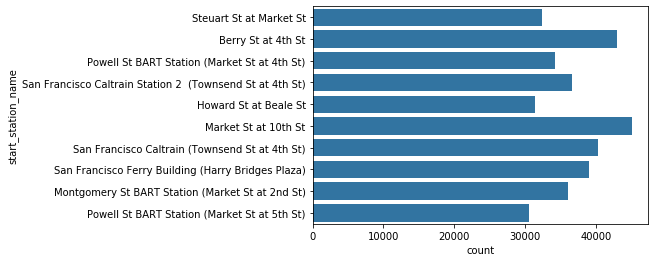

In [84]:
# top ten start stations
sb.countplot(data=top_start_stations_df, y='start_station_name',color=base_color)

**4a.) The most popular start station is Market station at 10th St.**

**5.) What are the most popular end stations?**

In [85]:
top_end_stations_df = df_clean.end_station_name.value_counts()[:10].index

In [87]:
top_end_stations_df = df_clean[df_clean.end_station_name.isin(top_end_stations)].copy()

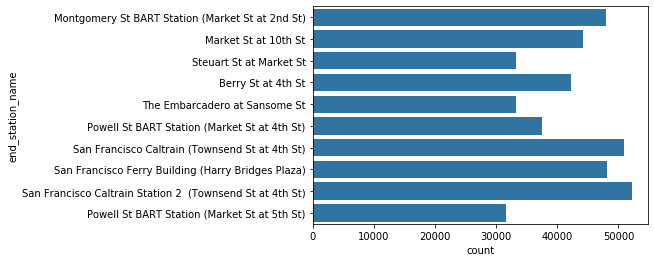

In [88]:
# top ten end stations
sb.countplot(data=top_end_stations_df, y='end_station_name',color=base_color)

**5a.) The most popular end station is the San Francisco Caltrain Station 2.**

In [90]:
df_clean.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [96]:
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

In [97]:
customer

485817

In [98]:
subscriber

2021166

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My variables of interest being mostly date and time.  I would like to see if there is a relationship betweed day of week, time of day and month between user and customer riders. It does seem to show at this point with no other variable involved that during the week is more popular than the weekend, to and from work hours see a surge of riders and the spring time is busier, however there is July that shows a significant amount of riders.  The start and end stations I would like to see performance of the station and if there are any distinguishing attributes.  And lastly the newer program bike share for all trip and the performance numbers and if it is valuable program. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The month column was cleaned added to and extracted from the start time colum.  There is a significant jump during July and I need to investigate further. I also extracted the days of the week column from the start date to look at popular day of the week. Again I extracted the hour from the start date column to examine the time of day that gets more usage than other.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

**6.) What is the average trip duration per month?**

Text(0, 0.5, 'Trip Duration(min)')

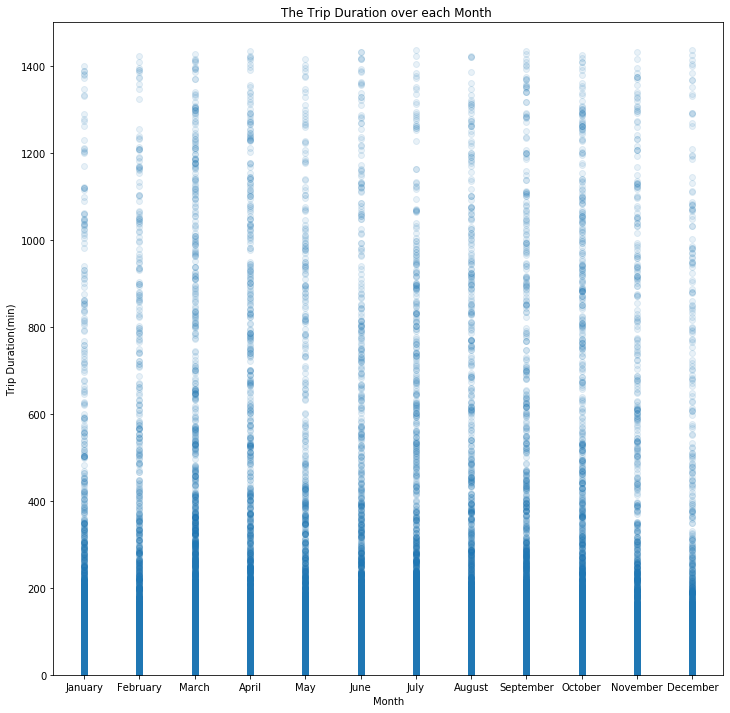

In [128]:
# look and check the trip duration changes over each month.
plt.figure(figsize = [12,12]) # make the whole figure bigger 
plt.scatter(data = df_clean , x = 'start_time_month' , y = 'duration_min' , alpha = 0.1 )
plt.ylim(0,1500)
plt.title('The Trip Duration over each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)')

**6a.) The trip duration is longer during the spring and summer months.**

**7.)Is there a distinction between the seasons and the trip durations?**

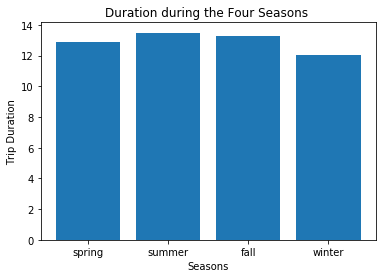

In [132]:
# lets create 4 season categories
spring_dur = df_clean.query('start_time_month_num in ["3" , "4" , "5"]' ).duration_min.mean ()
summer_dur = df_clean.query('start_time_month_num in ["6" , "7" , "8"] ').duration_min.mean()
fall_dur = df_clean.query('start_time_month_num in ["9" , "10" , "11"] ').duration_min.mean()
winter_dur = df_clean.query('start_time_month_num in ["12" , "1" , "2"]' ).duration_min.mean()



plt.bar(['spring','summer','fall','winter'],[spring_dur , summer_dur , fall_dur , winter_dur] )
plt.title('Duration during the Four Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

**7a.)The graph shows that summer and fall have longer duration times.**

**8.) Is one user type more pevalant than the other?**

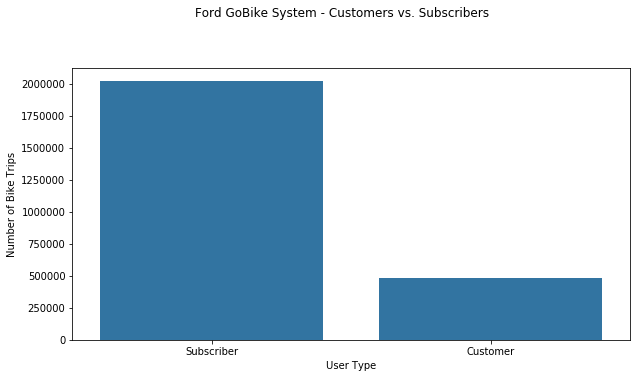

In [129]:
plt.figure(figsize = [10, 5])

graph = sb.countplot(data = df_clean, x = "user_type", order = df_clean.user_type.value_counts().index, color=base_color);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05);



**8a.) There are more subscribers than customers.**

**9.) What is the average number of bike trips by user time every month?**

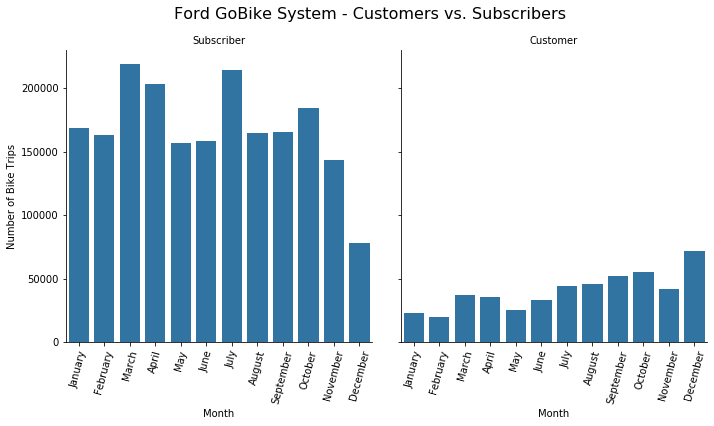

In [118]:
# Customer Usage by Month vs. Subscriber Usage by Month
#plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df_clean, x='start_time_month', col="user_type", kind='count', color = base_color);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16);
graph.set_xticklabels(rotation=75);

**9a.) The number of subscriber riders is more during the spring and July. And the number or customer riders is higher during December.**

**10.) What is the average number of bike trips per user type during the week?**

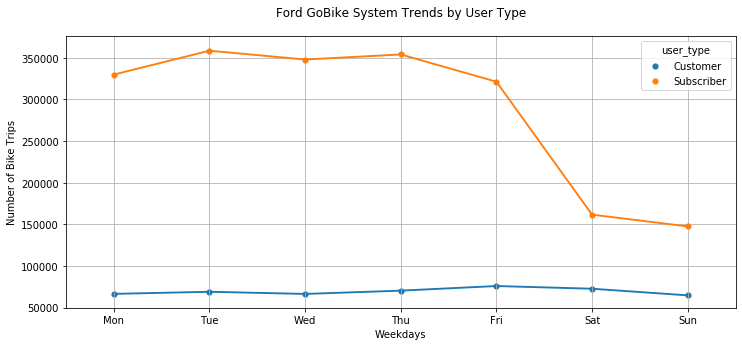

In [119]:
plt.figure(figsize=(12, 5))

df_clean_user_week = df_clean.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_clean_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05)
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

**10a.) The number of subscriber riders is way lower during the weekend and the customer is around the same during the week with a slight uptick on the weekend.**

**11.) What is the most popular start station per user?**

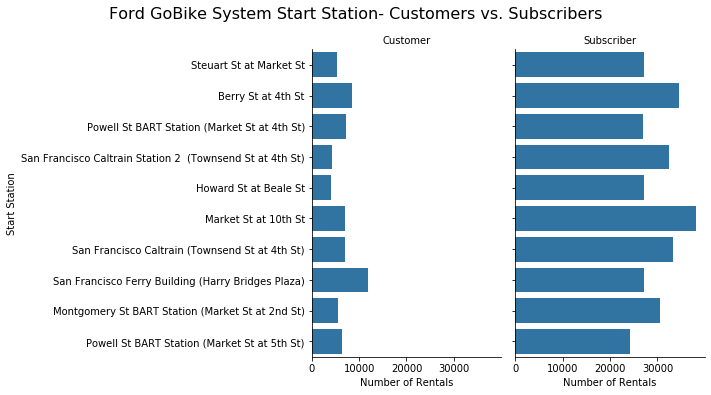

In [140]:
# Customer Usage by Start Station vs. Subscriber Usage by Start Station
#plt.figure(figsize = [12, 5])
graph = sb.catplot(data=top_start_stations_df, y='start_station_name', col="user_type", kind='count', color = base_color);

graph.set_axis_labels("Number of Rentals", "Start Station");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System Start Station- Customers vs. Subscribers', y=1.05, fontsize=16);


**11a.) The most popular start station for a customer is the San Fransico Ferry Building. And the most popular End station for subscribers is the Market station at 10th st.**

**12.) What is the most popular end station per user?**

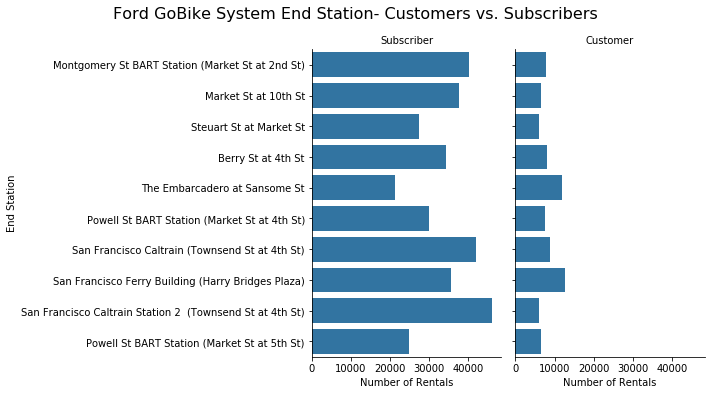

In [141]:
# Customer Usage by End Station vs. Subscriber Usage by End Station
#plt.figure(figsize = [12, 5])
graph = sb.catplot(data=top_end_stations_df, y='end_station_name', col="user_type", kind='count', color = base_color);

graph.set_axis_labels("Number of Rentals", "End Station");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System End Station- Customers vs. Subscribers', y=1.05, fontsize=16);


**12a.) The most popular end station for subscribers is San Francisco Caltrain Station 2. And the most popular end station for customers is the San Francisco Ferry Building.**

**13.) How popular is the bike share for all trip?**

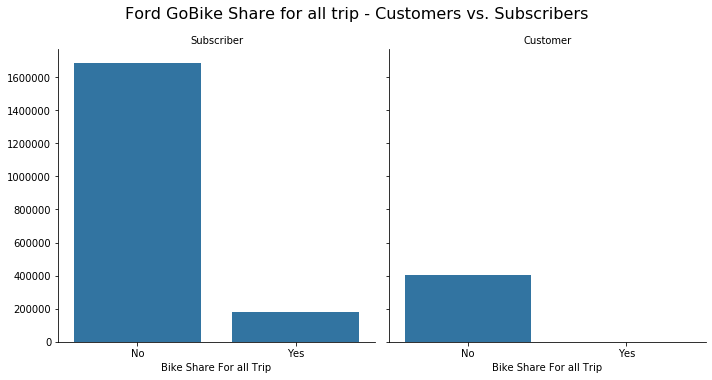

In [142]:
# bike_share_for_all_trip vs. user_type
#plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df_clean, x='bike_share_for_all_trip', col="user_type", kind='count', color = base_color);

graph.set_axis_labels("Bike Share For all Trip", "");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike Share for all trip - Customers vs. Subscribers', y=1.05, fontsize=16);

**13a.)The bike share for all trip is non-existant for customers and not as utilized as subscriber rentals.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a relationship with the rider user type and the amounts of rentals and certain times of year and days of the week. The customers seem to be touristy with the times of day, day of the week, and what stations are more popular they all stay about the same through out the year. The subscribers utilize the bike rentals for working comute during the week and working hours.    

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I was interested to see the the bike share for all trip data was not as stand out as I thought it would have been. Also it does not apply to a customer only to subscribers. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

**14.) How does the duration change per user during the week?**

Text(0, 0.5, 'Duration in Minutes')

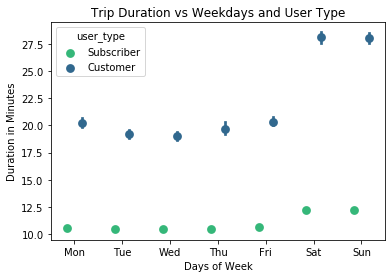

In [151]:

sb.pointplot(data = df_clean, x = 'start_time_weekday', y = 'duration_min', hue = 'user_type' , palette = 'viridis_r', dodge = 0.3, linestyles = "", order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Trip Duration vs Weekdays and User Type')
plt.xlabel('Days of Week')
plt.ylabel('Duration in Minutes')

**14a.)The subscriber has shorter duration times during the week and longer times during the weekend. The customer has higher duration times over the subscriber with the longest times being on the weekend.**

**15.) How does the start time hour change per user during the week?**

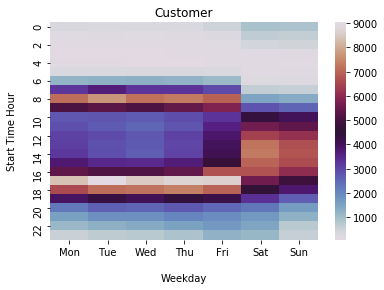

In [160]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

#plt.figure(figsize=(15,8))

# Heatmap - Customers
#plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')

heat_map = sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.show()



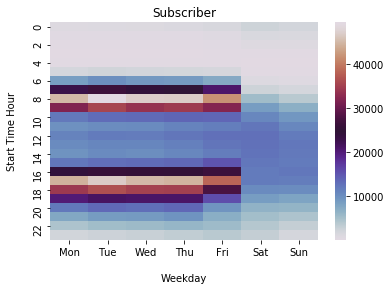

In [153]:
# Heatmap - Subscribers
#plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.show()

**15a.) The heat maps show a good description of popular times of day for specific users during the week. With subscribers using moring and evening comute hours and customers using during the day more on the weekends**

**16.)How does the trip duration change per user per month?**

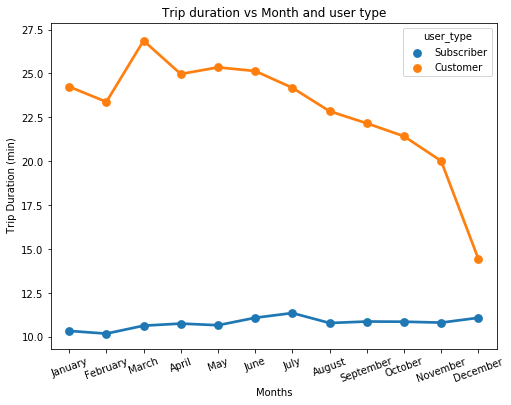

In [159]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'start_time_month', y = 'duration_min', hue = 'user_type', ci=None)
plt.title('Trip duration vs Month and user type')
plt.ylabel(' Trip Duration (min)')
plt.xlabel('Months')
plt.xticks(rotation=20)
plt.show();

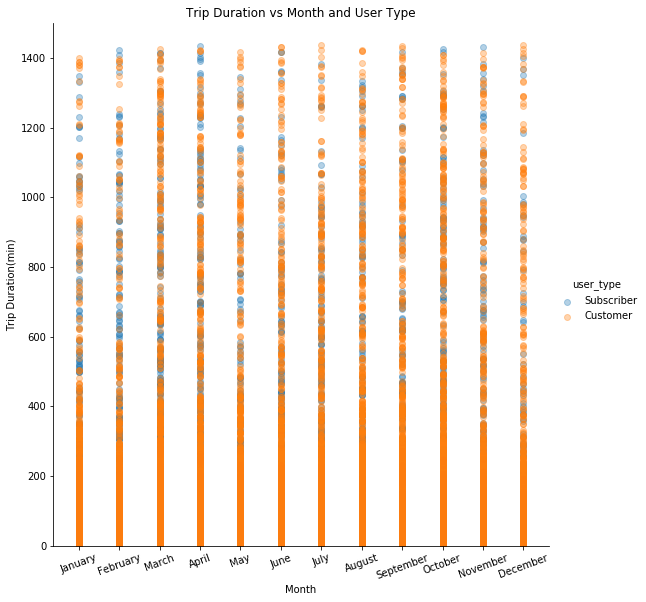

In [155]:
g = sb.FacetGrid(data =  df_clean, hue = 'user_type', height = 8)
g.map(plt.scatter, 'start_time_month','duration_min', alpha = 1/3)
g.add_legend()
plt.ylim(0, 1500)
plt.title('Trip Duration vs Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)')
plt.xticks(rotation=20);

**16a.) The trip duration for the subscriber is shorter all throuhout the year, which helps confirm that most subscribers use the service for work commute.  The average trip duration is significantlly longer for customers and dives to shorter trips during December.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> On average customers had a longer trip duration during the different months. 

> On average customers had longer trip duration during the days of the week over the subscribers.

> The heat map showed that the subscribers utilized the bike share during going to and coming from work while the customers utilized it mostly in the afternoon and all throughout the day during the weekend. 

### Were there any interesting or surprising interactions between features?

> I was suprised to see that even thought the subscribers have higher numbers of rentals they duration times were significantally lower and was not used even on the weekend. 